In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('fifa.csv')

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [5]:
df.shape

(18207, 60)

In [6]:
col=['Photo','Flag','Club Logo','Body Type','Jersey Number','Loaned From']
# for i,j in enumerate(df.columns):
#     if j in col:
df1=df.drop(col,axis=1)

In [7]:
df1.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

### Converting Value column 

In [8]:
df1['Value']=df1['Value'].str.replace('€','')
df1['Value'].head(5)

0    110.5M
1       77M
2    118.5M
3       72M
4      102M
Name: Value, dtype: object

In [9]:
for i in range(df1['Value'].shape[0]):
    if df1['Value'].iloc[i][-1]=='M':
        df1['Value'].iloc[i]=float(df1['Value'].iloc[i][:-1])
        df1['Value'].iloc[i]=df1['Value'].iloc[i]*1000000
    elif df1['Value'].iloc[i][-1]=='K':
        df1['Value'].iloc[i]=float(df1['Value'].iloc[i][:-1])
        df1['Value'].iloc[i]=df1['Value'].iloc[i]*1000
df1['Value']=df1['Value'].astype(float)

In [10]:
print(df1['Value'].dtypes)
df1['Value'].head(5)

float64


0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

### Converting Wage column 

In [11]:
df1['Wage']=df1['Wage'].str.replace('€','')
df1['Wage'].head(5)

0    565K
1    405K
2    290K
3    260K
4    355K
Name: Wage, dtype: object

In [12]:
for i in range(df1['Wage'].shape[0]):
    if df1['Wage'].iloc[i][-1]=='M':
        df1['Wage'].iloc[i]=float(df1['Wage'].iloc[i][:-1])
        df1['Wage'].iloc[i]=df1['Wage'].iloc[i]*1000000
    elif df1['Wage'].iloc[i][-1]=='K':
        df1['Wage'].iloc[i]=float(df1['Wage'].iloc[i][:-1])
        df1['Wage'].iloc[i]=df1['Wage'].iloc[i]*1000
df1['Wage']=df1['Wage'].astype(float)

In [13]:
df1['Wage'].head(5)

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

### Converting Joined column 

In [14]:
df1['Joined'] = df1['Joined'].apply(lambda x: int(x.split(' ')[-1]) if isinstance(x, str) else x)

In [15]:
print(df1['Joined'].head())
df1['Joined'].isnull().sum()

0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64


1553

### Converting Contract Valid Till column 

In [16]:
df1['Contract Valid Until'] = pd.to_datetime(df1['Contract Valid Until'], errors='raise')

In [17]:
df1[df1['Contract Valid Until'].isnull()==True].shape

(289, 54)

### Converting Height column 

In [18]:
df1['Height']=df1['Height'].apply(lambda x: float('.'.join(x.split("'"))) if isinstance(x, str) else x)

In [19]:
df1['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

### Converting Weight column 

In [20]:
df1['Weight'] = df1['Weight'].apply(lambda x: float(x[:-3]) if isinstance(x, str) else x)

In [21]:
df1['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

### Converting Release Clause column

In [22]:
def isNan(x):
    return x!=x

In [23]:
df1['Release Clause']=df1['Release Clause'].str.replace('€','')
df1['Release Clause'].head(5)

0    226.5M
1    127.1M
2    228.1M
3    138.6M
4    196.4M
Name: Release Clause, dtype: object

In [24]:
for i in range(df1['Release Clause'].shape[0]):
    if isNan(df1['Release Clause'].iloc[i])==False:
        if df1['Release Clause'].iloc[i][-1]=='M':
            df1['Release Clause'].iloc[i]=float(df1['Release Clause'].iloc[i][:-1])
            df1['Release Clause'].iloc[i]=df1['Release Clause'].iloc[i]*1000000
        elif df1['Release Clause'].iloc[i][-1]=='K':
            df1['Release Clause'].iloc[i]=float(df1['Release Clause'].iloc[i][:-1])
            df1['Release Clause'].iloc[i]=df1['Release Clause'].iloc[i]*1000
df1['Release Clause']=df1['Release Clause'].astype(float)

In [25]:
df1['Release Clause'].head(5)

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

### 1. Plot the distribution of Overall rating for all players. 

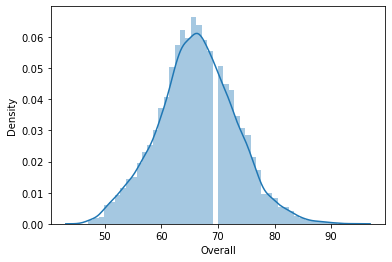

In [26]:
sns.distplot(df1['Overall'])
plt.show()

In [27]:
print('Skewness of "Overall"',df1['Overall'].skew())
print('Kurtosis of "Overall"',df1['Overall'].kurt())

Skewness of "Overall" 0.06718492227833812
Kurtosis of "Overall" 0.09656866702634614


### 2. Generate pair plots for the following variables:
####       Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

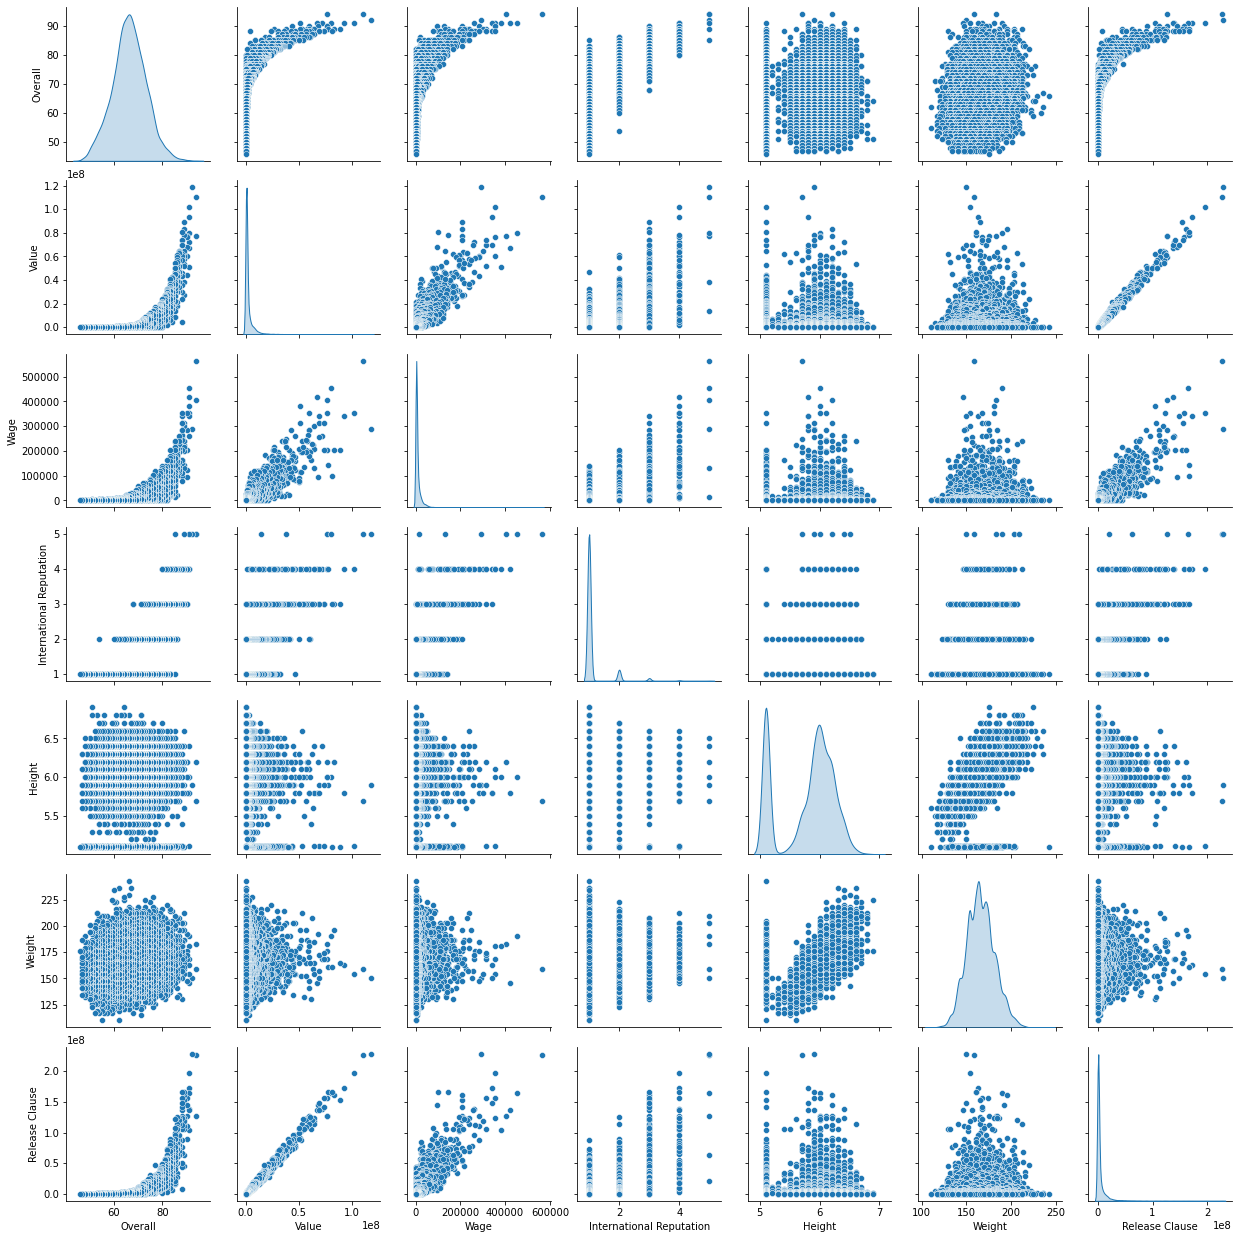

In [28]:
sns.pairplot(df1[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']],\
             diag_kind='kde')
plt.show()

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [29]:
top20=df1[df1['Contract Valid Until']=='2020-01-01'].sort_values(by='Overall',ascending=False)[:20]
top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


#### 3.a) What would the average wage for this set of players be?

In [30]:
print('The average wage for Top 20 players with contract ending in 2020 is €{}'.format(top20['Wage'].mean()))

The average wage for Top 20 players with contract ending in 2020 is €205450.0


#### 3.b) What is the average age?

In [31]:
print('The average age for Top 20 players with contract ending in 2020 is',top20['Age'].mean())

The average age for Top 20 players with contract ending in 2020 is 30.65


#### 3.c) Is there a correlation between the Overall rating and Value for these players?

In [32]:
top20[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


### 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [33]:
d={}
for i in df1['Position'].unique():
    if isNan(i)==False:
        d['Pos_'+str(i)]=list(df1.sort_values(by=['Overall'], ascending=False).groupby(df1['Position']).get_group(i)[:5]['Name'])

In [34]:
Top5_Pos=pd.DataFrame()
for i,j in d.items():
    Top5_Pos[i]=j

In [35]:
Top5_Pos

,Pos_RF,Pos_ST,Pos_LW,Pos_GK,Pos_RCM,Pos_LF,Pos_RS,Pos_RCB,Pos_LCM,Pos_CB,...,Pos_LM,Pos_LB,Pos_RDM,Pos_RW,Pos_CM,Pos_RB,Pos_RAM,Pos_CF,Pos_RWB,Pos_LWB
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Suárez,Sergio Ramos,David Silva,D. Godín,...,P. Aubameyang,Marcelo,P. Pogba,R. Sterling,Thiago,Azpilicueta,J. Cuadrado,S. Giovinco,S. Coleman,N. Schulz
1,D. Mertens,R. Lewandowski,Coutinho,J. Oblak,L. Modrić,P. Dybala,Z. Ibrahimović,Thiago Silva,T. Kroos,S. Umtiti,...,M. Reus,Jordi Alba,Illarramendi,Bernardo Silva,S. Milinković-Savić,K. Walker,H. Ziyech,Luis Alberto,P. Kadeřábek,Granell
2,D. Valeri,S. Agüero,Isco,M. Neuer,I. Rakitić,Iniesta,Falcao,Piqué,M. Hamšík,M. Benatia,...,S. Mané,Alex Sandro,I. Gueye,A. Sánchez,I. Gündoğan,Carvajal,Allan Bardinho,L. Stindl,M. Ginter,Jonny
3,L. Podolski,H. Kane,L. Insigne,T. Courtois,S. Khedira,Jonathan Viera,W. Ben Yedder,T. Alderweireld,M. Verratti,Naldo,...,Douglas Costa,Filipe Luís,D. De Rossi,R. Mahrez,Jorginho,Sergi Roberto,Kauã Abranches,Raffael,D. Caligiuri,J. Hector
4,C. Ciano,G. Bale,L. Sané,M. ter Stegen,J. Kimmich,J. Campbell,F. Quagliarella,L. Bonucci,A. Witsel,Miranda,...,I. Perišić,D. Alaba,M. Parolo,Marco Asensio,M. Dembélé,L. Bender,Sebas Couteira,A. Milik,Pablo Maffeo,P. Max


#### 4.a)	Are there any players appearing in more than one Table. Please point out such players.

In [36]:
dams=0
for i in Top5_Pos.values:
    for j in i:
        sum=0
        for k in Top5_Pos.columns:
            if j in Top5_Pos[k].values:
                sum+=1
        if sum>1:
            print(j)

#### 4.b) What is the average wage one can expect to pay for the top 5 in every position?

In [77]:
for i in Top5_Pos.columns:
    p=i.split('_')[-1]
    wg=df1.sort_values(by=['Overall'], ascending=False).groupby(df1['Position']).get_group(p)[:5]['Wage'].mean()
    print(f'Average Salary of Top 5 of Position {p} = {wg}')

Average Salary of Top 5 of Position RF = 148000.0
Average Salary of Top 5 of Position ST = 294000.0
Average Salary of Top 5 of Position LW = 261000.0
Average Salary of Top 5 of Position GK = 192800.0
Average Salary of Top 5 of Position RCM = 257400.0
Average Salary of Top 5 of Position LF = 123200.0
Average Salary of Top 5 of Position RS = 130400.0
Average Salary of Top 5 of Position RCB = 219000.0
Average Salary of Top 5 of Position LCM = 195400.0
Average Salary of Top 5 of Position CB = 124800.0
Average Salary of Top 5 of Position LDM = 138000.0
Average Salary of Top 5 of Position CAM = 174000.0
Average Salary of Top 5 of Position CDM = 199200.0
Average Salary of Top 5 of Position LS = 130600.0
Average Salary of Top 5 of Position LCB = 162000.0
Average Salary of Top 5 of Position RM = 133000.0
Average Salary of Top 5 of Position LAM = 81600.0
Average Salary of Top 5 of Position LM = 169000.0
Average Salary of Top 5 of Position LB = 177200.0
Average Salary of Top 5 of Position RDM = 1